<img src='https://drive.google.com/uc?id=1tqYIvII8lJ_FnqE6ugS21n4s93kMwTLy' />

## Machine Learning
## School of Computing and Engineering, University of West London
## Massoud Zolgharni

# Tutorial: Random Forest

# A Note About The Data
The data for this seminar is famous. Called, the iris dataset, it contains four variables measuring various parts of iris flowers of three related species, and then a fourth variable with the species name. The reason it is so famous in machine learning and statistics communities is because the data requires very little preprocessing (i.e. no missing values, all features are floating numbers, etc.).
https://archive.ics.uci.edu/ml/datasets/Iris/


In [119]:
import sys
print(sys.executable)

/opt/homebrew/opt/python@3.11/bin/python3.11


In [120]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

## Load Data

In [121]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [122]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Create Training And Test Data

Randomly split the data

In [123]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick way of randomly assigning some rows to
# be used as the training data and some as the test data.
# Set random seed
np.random.seed(0)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [124]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [125]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


## Preprocess Data

Create features

In [126]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Create Target label

In [127]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

# View target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

## Train The Random Forest Classifier

In [128]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
# We can specify the number of features using max_features
clf = RandomForestClassifier(max_features=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(max_features=2, random_state=0)

## Apply Classifier To Test Data

If you have been following along, you will know we only trained our classifier on part of the data, leaving the rest out. This is the most important part of machine learning. Because by leaving out a portion of the data, we have a set of data to test the accuracy of our model!

In [129]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
y_pred = clf.predict(test[features])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Remember that we coded each of the three species of plant as 0, 1, or 2. What the list of numbers above is showing you is what species our model predicts each plant is based on the the sepal length, sepal width, petal length, and petal width. How confident is the classifier about each plant? We can see that too.

In [130]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:25]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.67, 0.33],
       [0.  , 1.  , 0.  ],
       [0.  , 0.82, 0.18],
       [0.  , 0.03, 0.97],
       [0.  , 0.42, 0.58],
       [0.  , 0.99, 0.01],
       [0.  , 0.96, 0.04],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  ]])

There are three species of plant, thus [ 1. ,  0. ,  0. ] tells us that the classifier is certain that the plant is the first class. Taking another example, [ 0.9,  0.1,  0. ] tells us that the classifier gives a 90% probability the plant belongs to the first class and a 10% probability the plant belongs to the second class. Because 90 is greater than 10, the classifier predicts the plant is the first class.

## Evaluate Classifier

Now that we have predicted the species of all plants in the test data, we can compare our predicted species with the that plant's actual species.

In [131]:
# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]

In [132]:
# View the PREDICTED species for the first five observations
preds[0:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [133]:
# View the ACTUAL species for the first five observations
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

That looks pretty good! At least for the first five observations. Now let's use look at all the data.

## Create a confusion matrix

A confusion matrix can be a little confusing to interpret at first, but it is actually very straightforward. The columns are the species we predicted for the test data and the rows are the actual species for the test data. Therefore, if we take the top row, we can see that we predicted all 13 setosa plants in the test data perfectly. However, in the next row, we predicted 5 of the versicolor plants correctly, but mis-predicted two of the versicolor plants as virginica.

The short explanation of how to interpret a confusion matrix is: anything on the diagonal was classified correctly and anything off the diagonal was classified incorrectly.

In [134]:
# Create confusion matrix
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


## View Feature Importance

We do get a score telling us how important each feature was in classifying. This is one of the most powerful parts of random forests, because we can clearly see that petal width was more important in classification than sepal width.

In [135]:
# View a list of the features and their importance scores
#list(zip(train[features], clf.feature_importances_))
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.446485
petal width (cm)     0.446313
sepal length (cm)    0.084740
sepal width (cm)     0.022461
dtype: float64

## Visualisation

For visualisation, you can use a combination of matplotlib and seaborn. Because seaborn is built on top of matplotlib, it offers a number of customised themes and provides additional plot types. Matplotlib is a superset of seaborn and both are equally important for good visualizations.

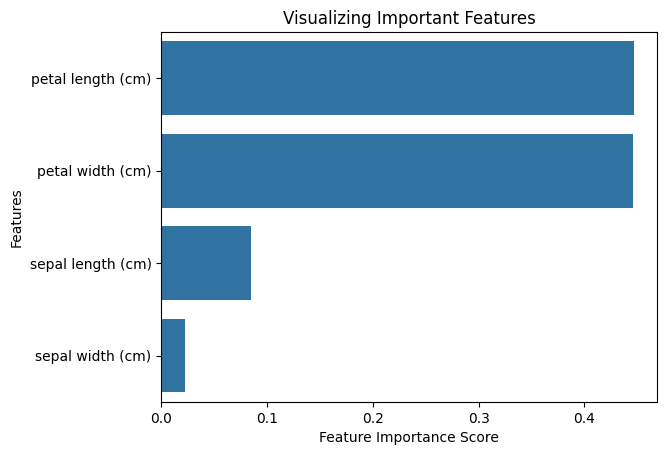

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [137]:
y_pred = clf.predict(test[features])
y_pred

y_test = pd.factorize(test['species'])[0]
y_test

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9375
